In [15]:
import os
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st

In [16]:
annualfed_path = os.path.join("resources_rates", "Fedfunds.csv")

with open(annualfed_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")

In [17]:
# read and convert Fedfunds rate data to annual 
data = pd.read_csv("resources_rates/Fedfunds.csv")
df = pd.DataFrame(data)
df['YEARS'] = pd.to_datetime(df['DATE'])
df.set_index('YEARS', inplace=True)
df.index = pd.to_datetime(df.index)
df.resample('A').mean()

data_fed = df.resample('A').mean()
data_fed 

,FEDFUNDS
YEARS,
2012-12-31,0.140000
2013-12-31,0.107500
2014-12-31,0.089167
2015-12-31,0.132500
2016-12-31,0.395000
2017-12-31,1.001667
2018-12-31,1.831667
2019-12-31,2.158333
2020-12-31,0.375833


In [18]:
mtg30_path = os.path.join("resources_rates", "Mtg30.csv")

with open(annualfed_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")

In [19]:
# read and convert 30Years mortgage data to annual
data = pd.read_csv("resources_rates/Mtg30.csv")
df = pd.DataFrame(data)
df['YEARS'] = pd.to_datetime(df['DATE'])
df.set_index('YEARS', inplace=True)
df.index = pd.to_datetime(df.index)
df.resample('A').mean()

data_mtg = df.resample('A').mean()
data_mtg 



,30YRS
YEARS,
2012-12-31,3.657500
2013-12-31,3.975577
2014-12-31,4.168868
2015-12-31,3.850577
2016-12-31,3.654038
2017-12-31,3.989808
2018-12-31,4.544615
2019-12-31,3.935769
2020-12-31,3.111698


In [28]:
#merge the fed rates and 30 year mtg rate
rates_df = pd.merge(data_fed, data_mtg, on=["YEARS"])
rates_df
#align columns into one line
rates_df = rates_df.reset_index()



# Format to go to two decimal places, include a dollar sign, and use comma notation

rates_df["FEDFUNDS"] = rates_df["FEDFUNDS"].astype(float).map("{:,.2f}".format)
rates_df["30YRS"] = rates_df["30YRS"].astype(float).map("{:,.2f}".format)
rates_df

,YEARS,FEDFUNDS,30YRS
0,2012-12-31,0.14,3.66
1,2013-12-31,0.11,3.98
2,2014-12-31,0.09,4.17
3,2015-12-31,0.13,3.85
4,2016-12-31,0.40,3.65
5,2017-12-31,1.00,3.99
6,2018-12-31,1.83,4.54
7,2019-12-31,2.16,3.94
8,2020-12-31,0.38,3.11
9,2021-12-31,0.08,2.96


In [21]:
# # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# rate_bar = rates_df.groupby(["YEARS"]).count()["FEDFUNDS"] 


# plot_pandas = rate_bar.plot.bar(figsize=(10,5), color='y',fontsize = 14)
# rate_bar

# plt.xlabel("Years",fontsize = 8)
# plt.ylabel("Fed rate (%)",fontsize = 12)
# plt.title("Fed Rates vs Years",fontsize = 20)

# plt.tight_layout()
# plt.show()

# rate_bar

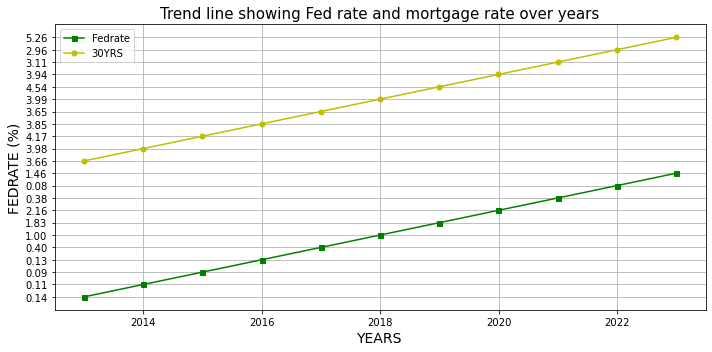

In [53]:

# # Generate a line plot
# rates_plot = rates_df.loc[rates_df["YEARS"] == "FEDFUNDS",:]
# rates_plot.head()

x1 = rates_df["YEARS"]
y1 = rates_df["FEDFUNDS"]
y2 = rates_df["30YRS"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

plt.plot(x1, y1, markersize=5,marker="s",color="g", label= "Fedrate")
plt.plot(x1, y2, markersize=5,marker="o",color="y", label= "30YRS")
plt.title('Trend line showing Fed rate and mortgage rate over years',fontsize =15)
plt.xlabel('YEARS',fontsize =14)
plt.ylabel('FEDRATE (%)',fontsize =14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
